🔹 Mean Squared Error: 0.3552


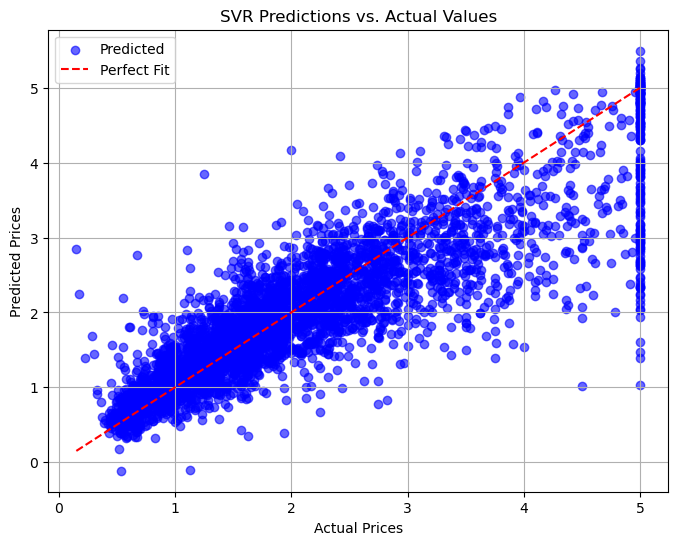

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))
y = df["target"]  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"🔹 Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR Predictions vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()
